<a href="https://colab.research.google.com/github/Rishitha110506/Machine-Learning/blob/main/ML_lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MACHINE LEARNING (LAB ASSIGNMENT - 03)


NAME : KAMPALLI RISHITHA

REG NO : BL.SC.U4AIE24020

SEC : D.sec

A1:

 Write your own functions to evaluate following for vectors,A&B where A&B are vectors N-dimensional space. find dotproduct between A&B
and length of vectors with euclidean Norm



compare the obtained results using numpy.dot() & numpy.linalg.norm()

In [4]:
import numpy as np
#user input
A=list(map(float, input("Enter the values for vector A:").split()))
B=list(map(float, input("Enter the values for vector B:").split()))

#manual calculations:
dot=sum(a*b for a,b in zip(A,B))
normA=(sum(a*a for a in A))**0.5
normB=(sum(b*b for b in B))**0.5

#numPy calculations
numpy_dot=np.dot(A,B)
numpy_normA=np.linalg.norm(A)
numpy_normB=np.linalg.norm(B)

#output:
print(f"Dot product - Manual: {dot}, Numpy:{numpy_dot} ")
print(f"length of A  - Manual:{normA:.3f}, Numpy:{numpy_normA:.3f}")
print(f"length of B  - Manual:{normB:.3f}, Numpy:{numpy_normB:.3f}")




Enter the values for vector A:1 2 3
Enter the values for vector B:4 5 6
Dot product - Manual: 32.0, Numpy:32.0 
length of A  - Manual:3.742, Numpy:3.742
length of B  - Manual:8.775, Numpy:8.775


Fetching data


In [5]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Load the uploaded Excel file
df = pd.read_excel("BERT_Embeddings.xlsx")

# Save as CSV
df.to_csv("BERT_Embeddings.csv", index=False)

# Preview the first few rows
print(df.head())

Saving BERT_Embeddings.xlsx to BERT_Embeddings.xlsx
          0         1         2         3         4         5         6  \
0  0.025568  0.042430  0.016463  0.205958  0.072169  0.122228 -0.003409   
1  0.205218 -0.000216  0.329248 -0.133093 -0.023144  0.092500 -0.183787   
2  0.302459  0.087675  0.266277  0.174928  0.270119 -0.122046  0.085451   
3  0.283325  0.167030  0.139336  0.094306 -0.020424  0.093841 -0.021465   
4  0.320879 -0.093648  0.119425  0.191417 -0.007830  0.236620 -0.052938   

          7         8         9  ...       761       762       763       764  \
0  0.024455  0.047286  0.127876  ...  0.171996 -0.279748  0.083019  0.000174   
1 -0.151052 -0.051019 -0.275225  ... -0.107421 -0.224334 -0.263269  0.224133   
2  0.049851  0.001328 -0.030801  ... -0.026183 -0.267059  0.190339  0.153742   
3 -0.105555 -0.249112  0.081326  ... -0.166081 -0.045050  0.052088  0.248291   
4  0.227950 -0.005876 -0.028800  ... -0.328193 -0.448884  0.220072  0.114238   

        765     

In [6]:
import pandas as pd

# Load the CSV
df = pd.read_csv("BERT_Embeddings.csv")

# Preview the first few rows
print(df.head())

# Check shape and column names
print(df.shape)
print(df.columns)


          0         1         2         3         4         5         6  \
0  0.025568  0.042430  0.016463  0.205958  0.072169  0.122228 -0.003409   
1  0.205218 -0.000216  0.329248 -0.133093 -0.023144  0.092500 -0.183787   
2  0.302459  0.087675  0.266277  0.174928  0.270119 -0.122046  0.085451   
3  0.283325  0.167030  0.139336  0.094306 -0.020424  0.093841 -0.021465   
4  0.320879 -0.093648  0.119425  0.191417 -0.007830  0.236620 -0.052938   

          7         8         9  ...       761       762       763       764  \
0  0.024455  0.047286  0.127876  ...  0.171996 -0.279748  0.083019  0.000174   
1 -0.151052 -0.051019 -0.275225  ... -0.107421 -0.224334 -0.263269  0.224133   
2  0.049851  0.001328 -0.030801  ... -0.026183 -0.267059  0.190339  0.153742   
3 -0.105555 -0.249112  0.081326  ... -0.166081 -0.045050  0.052088  0.248291   
4  0.227950 -0.005876 -0.028800  ... -0.328193 -0.448884  0.220072  0.114238   

        765       766       767  \
0  0.172236  0.087777  0.218887  

In [7]:
import pandas as pd
import numpy as np

# Load Excel file
df = pd.read_excel("BERT_Embeddings.xlsx")

# Extract feature vectors using integer position
x = df.iloc[:, 0:768].values # first 768 columns are features

# Extract class labels (assuming 'label' is the last column)
y = df['label'].values

print("Shape of feature matrix X:", x.shape)
print("Shape of label vector y:", y.shape)
print("First 5 labels:", y[:5])
print("First feature vector:", x[0][:10])

Shape of feature matrix X: (3311, 768)
Shape of label vector y: (3311,)
First 5 labels: [3 2 3 2 1]
First feature vector: [ 0.02556794  0.04243043  0.01646283  0.20595784  0.07216926  0.12222795
 -0.00340946  0.02445455  0.04728632  0.12787624]


A2 :

This program loads BERT embeddings from an Excel file, separates features and labels, and focuses on two chosen classes. It computes the centroid (mean vector) and spread (standard deviation) of each class, then calculates the Euclidean distance between the two centroids. The output shows the first five dimensions of each centroid and spread, along with the interclass distance, which helps measure how distinct the two classes are in embedding space.


In [9]:
import pandas as pd
import numpy as np

#calculating mean of each column
def mean_vector(matrix):
    return matrix.mean(axis=0)
#calculating variance of each column
def variance_vector(matrix):
    return matrix.var(axis=0)
#standard deviation of each column
def std_vector(matrix):
    return matrix.std(axis=0)
#calculating mean
def centroid(matrix):
    return mean_vector(matrix)
# euclidean distance
def interclass_distance(c1, c2):
    return np.linalg.norm(c1 - c2)
#filter
def filter_class(x_data, y_data, label):
    return x_data[y_data == label]


#load data set
df = pd.read_excel("BERT_Embeddings.xlsx")
#feature and labels
X = df.iloc[:, :768].to_numpy() #feature matrix
y = df['label'].to_numpy()     #labels array

#picking any 2 classes from data set
label_a, label_b = 1, 2
#calculation
X_a = filter_class(X, y, label_a)     #data for class A
X_b = filter_class(X, y, label_b)     #data for class B


centroid_a = centroid(X_a)         #mean of class A
centroid_b = centroid(X_b)         #mean of class B


spread_a = std_vector(X_a)        #standard deviation of A
spread_b = std_vector(X_b)        #standard deviation of B

#calculating euclidean diatance
dist_ab = interclass_distance(centroid_a, centroid_b)


print(f"Class {label_a} mean :", centroid_a[:5])
print(f"Class {label_b} mean :", centroid_b[:5])
print(f"Class {label_a} standard deviation:", spread_a[:5])
print(f"Class {label_b} standard deviation :", spread_b[:5])
print(f"Euclidean distance between class {label_a} and {label_b}:", dist_ab)

Class 1 mean : [0.17973525 0.04346325 0.03340498 0.04900493 0.10446794]
Class 2 mean : [0.1933182  0.05473751 0.02195784 0.07093774 0.16202715]
Class 1 standard deviation: [0.14202072 0.12941112 0.16972862 0.15249167 0.17694833]
Class 2 standard deviation : [0.13064601 0.11889301 0.15399545 0.1436644  0.15107092]
Interclass distance between class 1 and 2: 1.1269519426376462


A3

This program loads BERT embeddings from an Excel file, selects one feature dimension and extracts all values for that feature across the dataset. It then computes the mean and variance of those values to summarize their distribution. Finally, it plots a histogram to visualize how the feature values are spread. The printed output shows the chosen feature index along with its mean and variance, while the histogram provides a graphical view of the distribution.

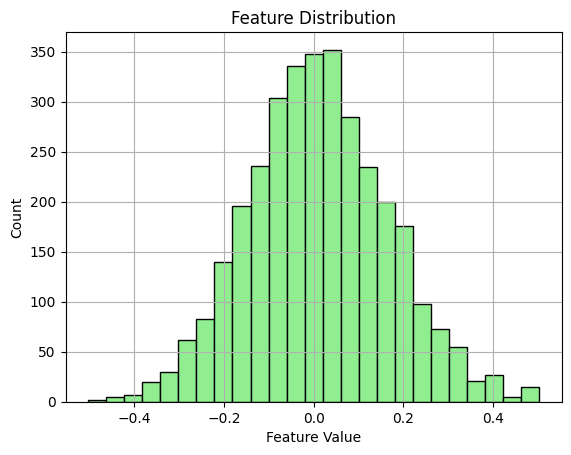

Index: 100
Mean : 0.0111
Variance : 0.0244


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def get_feature_column(x_data, idx):
    return x_data[:, idx]
#calculating mean
def feature_mean(values):
    return values.mean()
#calculating variance
def feature_variance(values):
    return values.var()
#plotting
def plot_histogram(values, bins=25):
    plt.hist(values, bins=bins, color='lightgreen', edgecolor='black')
    plt.title("Feature Distribution")    # plot title
    plt.xlabel("Feature Value")          # Label x-axis
    plt.ylabel("Count")                  # Label y-axis
    plt.grid(True)                       # Add grid lines
    plt.show()                           # Display the plot


# Load dataset
df = pd.read_excel("BERT_Embeddings.xlsx")


X = df.iloc[:, :768].to_numpy()              # Extract vectors (first 768 columns)
y = df['label'].to_numpy()                   # Extract class labels

# selecting one feature dimension
feature_idx = 100

# gettings values for chosen feature
values = get_feature_column(X, feature_idx)

#mean and variance of feature
mean_val = feature_mean(values)
var_val = feature_variance(values)

# Plot histogram of the feature values
plot_histogram(values, bins=25)


print(f"Index: {feature_idx}")
print(f"Mean : {mean_val:.4f}")
print(f"Variance : {var_val:.4f}")

A4 :

This program loads BERT embeddings from an Excel file, selects two feature vectors (rows 0 and 1), and computes their Minkowski distances for different values of p ranging from 1 to 10. The Minkowski distance generalizes metrics like Manhattan (p=1) and Euclidean (p=2). The program then plots a curve showing how the distance changes with different p values and prints the computed distances.


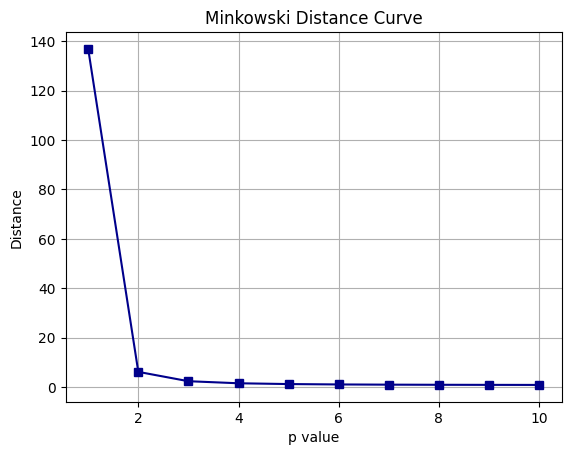

Feature vector A: Row 0 from dataset
Feature vector B: Row 1 from dataset
Minkowski distances from p=1 to p=10:
p = 1: distance = 136.8811
p = 2: distance = 6.1475
p = 3: distance = 2.3669
p = 4: distance = 1.5321
p = 5: distance = 1.2122
p = 6: distance = 1.0563
p = 7: distance = 0.9698
p = 8: distance = 0.9180
p = 9: distance = 0.8852
p = 10: distance = 0.8635


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#minkowski distance
def minkowski_distance(v1, v2, p):
    return np.sum(np.abs(v1 - v2) ** p) ** (1 / p)
def compute_minkowski_list(v1, v2, p_range):
    return [minkowski_distance(v1, v2, p) for p in p_range]

def plot_distances(p_range, dist_list):
    plt.plot(p_range, dist_list, marker='s', color='darkblue')
    plt.title("Minkowski Distance Curve")                        # plot title
    plt.xlabel("p value")                                        # Label x-axis
    plt.ylabel("Distance")                                       # Label y-axis
    plt.grid(True)                                               # Add grid lines
    plt.show()                                                   # Display the plot



# Load dataset from Excel file
df = pd.read_excel("BERT_Embeddings.xlsx")

# features and labels
X = df.iloc[:, :768].to_numpy()
y = df['label'].to_numpy()

# Select two feature vectors from dataset
vec_A = X[0]
vec_B = X[1]

# Calculating Minkowski distances
p_values = range(1, 11)
distances = compute_minkowski_list(vec_A, vec_B, p_values)

# Plot minkowsi distance curve
plot_distances(p_values, distances)

print("Feature vector A: Row 0 from dataset")
print("Feature vector B: Row 1 from dataset")
print("Minkowski distances from p=1 to p=10:")
for p, d in zip(p_values, distances):
    print(f"p = {p}: distance = {d:.4f}")

A5 :

we compared Minkowski distances between two feature vectors from the dataset using both a custom function and Scipy’s built-in minkowski() function. We calculated distances for values of
𝑝
 from 1 to 10 and confirmed that both methods produced identical results. This validated the correctness of our custom implementation and showed how distance values decrease and stabilize as
𝑝
 increases.

In [2]:
from google.colab import files
uploaded = files.upload()


Saving BERT_Embeddings.xlsx to BERT_Embeddings.xlsx


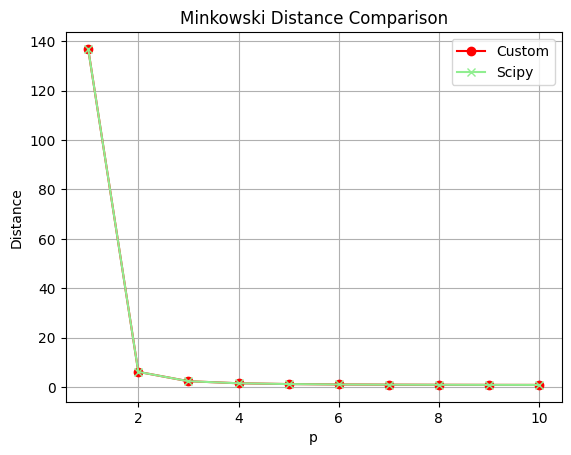

vector A: Row 0
 vector B: Row 1
Minkowski distances (Custom vs Scipy):
p = 1: Custom = 136.8811, Scipy = 136.8811
p = 2: Custom = 6.1475, Scipy = 6.1475
p = 3: Custom = 2.3669, Scipy = 2.3669
p = 4: Custom = 1.5321, Scipy = 1.5321
p = 5: Custom = 1.2122, Scipy = 1.2122
p = 6: Custom = 1.0563, Scipy = 1.0563
p = 7: Custom = 0.9698, Scipy = 0.9698
p = 8: Custom = 0.9180, Scipy = 0.9180
p = 9: Custom = 0.8852, Scipy = 0.8852
p = 10: Custom = 0.8635, Scipy = 0.8635


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski  # ✅ using the exact required function

# Custom Minkowski distance
def minkowski_distance_custom(vec1, vec2, p):
    return sum(abs(a - b) ** p for a, b in zip(vec1, vec2)) ** (1 / p)

# Compare both methods
def compare_minkowski_distances(vec1, vec2, p_range):
    custom = [minkowski_distance_custom(vec1, vec2, p) for p in p_range]
    scipy_ = [minkowski(vec1, vec2, p) for p in p_range]  # ✅ using scipy.spatial.distance.minkowski()
    return custom, scipy_

# Plot both results
def plot_comparison(p_range, custom, scipy_):
    plt.plot(p_range, custom, marker='o', label='Custom', color='red')
    plt.plot(p_range, scipy_, marker='x', label='Scipy', color='lightgreen')
    plt.title("Minkowski Distance Comparison")
    plt.xlabel("p")
    plt.ylabel("Distance")
    plt.legend()
    plt.grid(True)
    plt.show()

# Load data
df_full = pd.read_excel("BERT_Embeddings.xlsx")
x_full = df_full.iloc[:, 0:768].values
y_full = df_full['label'].values

# Pick two vectors
vec_A = x_full[0]
vec_B = x_full[1]

# Range of p values
p_values = list(range(1, 11))

# Compute distances
custom_dists, scipy_dists = compare_minkowski_distances(vec_A, vec_B, p_values)

# Plot
plot_comparison(p_values, custom_dists, scipy_dists)

# Output
print("vector A: Row 0")
print(" vector B: Row 1")
print("Minkowski distances (Custom vs Scipy):")
for p, d1, d2 in zip(p_values, custom_dists, scipy_dists):
    print(f"p = {p}: Custom = {d1:.4f}, Scipy = {d2:.4f}")


A6 :

 we filtered the dataset to include only two classes (1 and 2), then used train_test_split() to divide the data into training and testing sets. This prepares the data for model training and evaluation in later steps. The split ensures 70% of the data is used for training and 30% for testing.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_excel("BERT_Embeddings.xlsx")
x = df.iloc[:, 0:768].values       # Feature vectors
y = df['label'].values             # Class labels

# Filter two classes (e.g., 1 and 2)
mask = (y == 1) | (y == 2)
x_two = x[mask]
y_two = y[mask]

# Split into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(x_two, y_two, test_size=0.3, random_state=42)

# Output
print("Train samples:", len(X_train))
print("Test samples:", len(X_test))


Train samples: 1108
Test samples: 475


A7:

we trained a k-Nearest Neighbors classifier using the training set. The model learns to classify data points based on the majority class among their 3 nearest neighbors.



In [8]:
# Import the required library for kNN
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Create the kNN classifier object
# We set n_neighbors=3 to use the 3 nearest neighbors for classification
knn_model = KNeighborsClassifier(n_neighbors=3)

# Step 2: Train the classifier using the training data
# X_train contains the feature vectors, y_train contains the corresponding class labels
knn_model.fit(X_train, y_train)

# Step 3: Confirm training is complete
print("k-Nearest Neighbors classifier has been successfully trained with k = 3.")
print("Number of training samples:", len(X_train))
print("Number of features per sample:", X_train.shape[1])


k-Nearest Neighbors classifier has been successfully trained with k = 3.
Number of training samples: 1108
Number of features per sample: 768


A8:
we tested how well the trained kNN model performs on unseen data. The .score() function returns the percentage of correct predictions on the test set.

In [9]:
# Evaluate accuracy on test set
accuracy = model.score(X_test, y_test)
print("Accuracy:", round(accuracy * 100, 2), "%")


Accuracy: 73.05 %


A9:

we used the predict() function to classify test vectors. We also selected one specific test vector (the first one) to compare its predicted class with the actual label.

In [10]:
# Predict all test labels
y_pred = model.predict(X_test)

# Predict one test vector (first one)
test_vect = X_test[0]
predicted_class = model.predict([test_vect])
print("Predicted class for test vector 0:", predicted_class[0])
print("Actual class for test vector 0:", y_test[0])


Predicted class for test vector 0: 2
Actual class for test vector 0: 2


A10:

We implemented kNN manually and compared its predictions and accuracy with Scikit-learn’s version. This validates our understanding and implementation.

In [11]:
from collections import Counter
import numpy as np

# Custom kNN using Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_custom_predict(x_train, y_train, x_test, k=3):
    predictions = []
    for test_point in x_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in x_train]
        k_indices = np.argsort(distances)[:k]
        k_labels = [y_train[i] for i in k_indices]
        predictions.append(Counter(k_labels).most_common(1)[0][0])
    return np.array(predictions)

# Predict and compare
y_pred_custom = knn_custom_predict(X_train, y_train, X_test, k=3)
y_pred_package = model.predict(X_test)

# Accuracy comparison
acc_custom = np.mean(y_pred_custom == y_test)
acc_package = model.score(X_test, y_test)

print("Custom kNN Accuracy:", round(acc_custom * 100, 2), "%")
print("Package kNN Accuracy:", round(acc_package * 100, 2), "%")


Custom kNN Accuracy: 73.05 %
Package kNN Accuracy: 73.05 %


A11:

We varied
𝑘
 from 1 to 11 and plotted accuracy to observe how model performance changes. This helps identify the optimal value of
𝑘
.

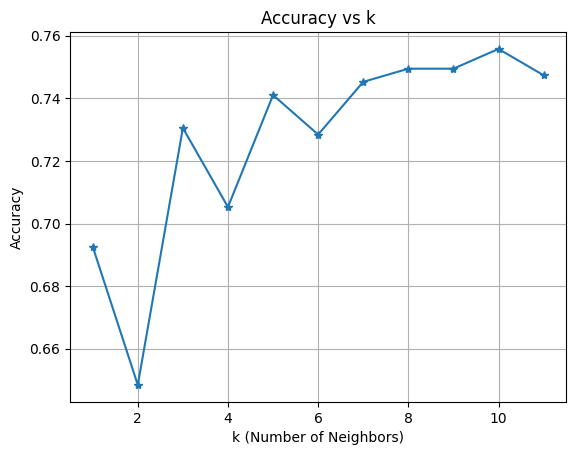

In [13]:
import matplotlib.pyplot as plt

k_values = range(1, 12)
accuracies = []

for k in k_values:
    model_k = KNeighborsClassifier(n_neighbors=k)
    model_k.fit(X_train, y_train)
    acc = model_k.score(X_test, y_test)
    accuracies.append(acc)

# Plot accuracy vs k
plt.plot(k_values, accuracies, marker='*')
plt.title("Accuracy vs k")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


A12:

We evaluated the confusion matrix and key metrics like precision, recall, and F1-score to understand model performance and detect underfitting or overfitting.

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix and report
conf_matrix = confusion_matrix(y_test, y_pred_package)
report = classification_report(y_test, y_pred_package)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


Confusion Matrix:
 [[ 36 102]
 [ 26 311]]

Classification Report:
               precision    recall  f1-score   support

           1       0.58      0.26      0.36       138
           2       0.75      0.92      0.83       337

    accuracy                           0.73       475
   macro avg       0.67      0.59      0.59       475
weighted avg       0.70      0.73      0.69       475



A13:

We wrote custom functions to compute confusion matrix and metrics like accuracy, precision, recall, and F₀.₅ score. This reinforces understanding of evaluation logic.

In [15]:
def compute_confusion_matrix(y_true, y_pred):
    labels = np.unique(y_true)
    matrix = np.zeros((2, 2), dtype=int)
    for true, pred in zip(y_true, y_pred):
        i = int(true == labels[1])
        j = int(pred == labels[1])
        matrix[i][j] += 1
    return matrix

def compute_metrics(matrix):
    TP = matrix[1][1]
    TN = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = (TP + TN) / np.sum(matrix)
    precision = TP / (TP + FP) if (TP + FP) else 0
    recall = TP / (TP + FN) if (TP + FN) else 0
    f_beta = (1 + 0.5**2) * (precision * recall) / ((0.5**2 * precision) + recall) if (precision + recall) else 0
    return accuracy, precision, recall, f_beta

# Apply custom metrics
matrix = compute_confusion_matrix(y_test, y_pred_package)
acc, prec, rec, f_beta = compute_metrics(matrix)

print("Custom Accuracy:", round(acc * 100, 2), "%")
print("Precision:", round(prec, 2))
print("Recall:", round(rec, 2))
print("F₀.₅ Score:", round(f_beta, 2))


Custom Accuracy: 73.05 %
Precision: 0.75
Recall: 0.92
F₀.₅ Score: 0.78


A14:

We trained a matrix-based classifier (Logistic Regression) and compared its accuracy with kNN. This helps assess which model performs better for your dataset.

In [16]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression (matrix-based classifier)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_acc = log_model.score(X_test, y_test)

# Compare with kNN
knn_acc = model.score(X_test, y_test)

print("Logistic Regression Accuracy:", round(log_acc * 100, 2), "%")
print("kNN Accuracy:", round(knn_acc * 100, 2), "%")


Logistic Regression Accuracy: 74.74 %
kNN Accuracy: 73.05 %


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
